# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Finding Donors for *CharityML*

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Please specify WHICH VERSION OF PYTHON you are using when submitting this notebook. Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=1))

age   workclass education_level  education-num  marital-status  \
0   39   State-gov       Bachelors           13.0   Never-married   

      occupation    relationship    race    sex  capital-gain  capital-loss  \
0   Adm-clerical   Not-in-family   White   Male        2174.0           0.0   

   hours-per-week  native-country income  
0            40.0   United-States  <=50K

### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

** HINT: ** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [4]:
# TODO: Total number of records
from __future__ import division
n_records = data.shape[0]

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = data[(data.income==">50K")].shape[0]

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = data[(data.income=="<=50K")].shape[0]

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = n_greater_50k/n_records * 100

# Print the results
print "Total number of records: {}".format(n_records)
print "Individuals making more than $50,000: {}".format(n_greater_50k)
print "Individuals making at most $50,000: {}".format(n_at_most_50k)
print "Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent)

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [4]:
data.describe()

age  education-num  capital-gain  capital-loss  hours-per-week
count  45222.000000   45222.000000  45222.000000  45222.000000    45222.000000
mean      38.547941      10.118460   1101.430344     88.595418       40.938017
std       13.217870       2.552881   7506.430084    404.956092       12.007508
min       17.000000       1.000000      0.000000      0.000000        1.000000
25%       28.000000       9.000000      0.000000      0.000000       40.000000
50%       37.000000      10.000000      0.000000      0.000000       40.000000
75%       47.000000      13.000000      0.000000      0.000000       45.000000
max       90.000000      16.000000  99999.000000   4356.000000       99.000000

# ** Visualizations on the data **

** Workclass vs Income **

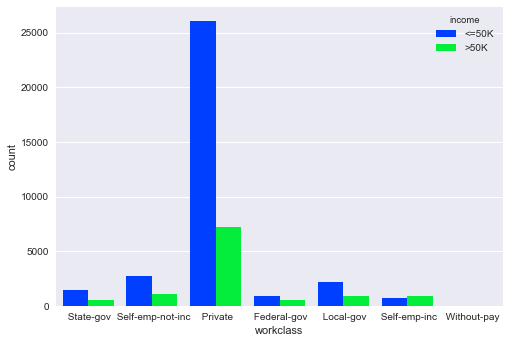

In [5]:
import seaborn as sns
sns.set(palette='bright')
sns.countplot(x='workclass',hue='income',data=data,saturation=1) # gives an info that private sector are ,more in number and 
#earn more , so they are likley to donate.

** Workclass and Occupation vs Income**

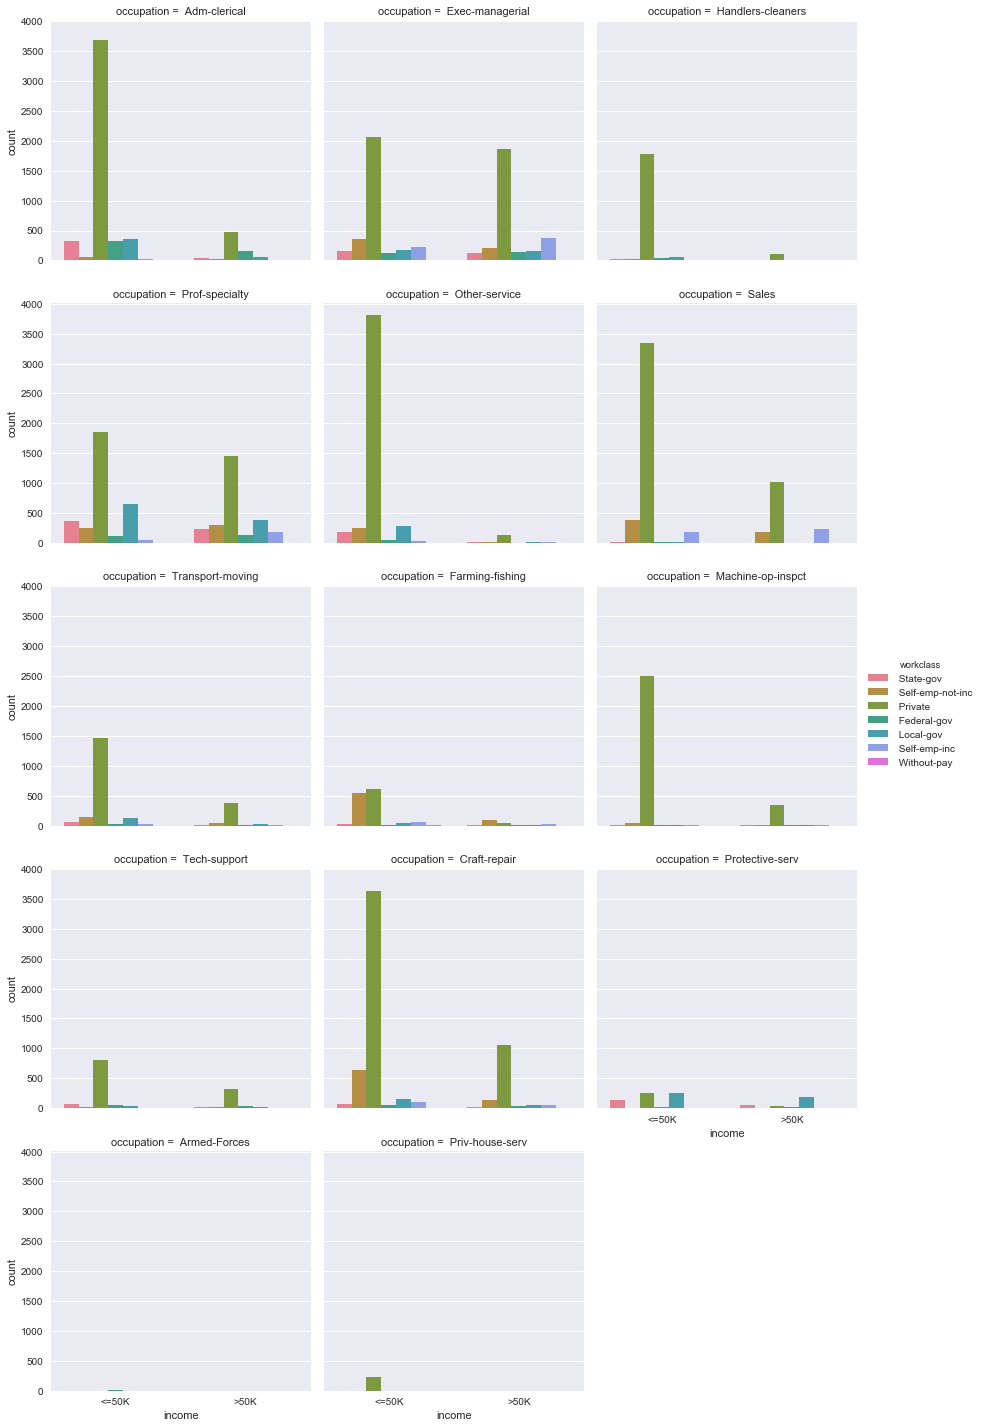

In [6]:
sns.factorplot('income',col='occupation',hue='workclass',data=data,col_wrap=3,kind='count',palette='husl')
# This visualization gives and idea about the income of various workclass in each occupation. We can deduce that private sector 
# in all occupations are more in number and are actually the ones who are making more the 50K. Occupations like Exec-managerial
# Prof-speciality, sales are the only ones who are making more than 50K.

** Sex and Occupation vs Income **

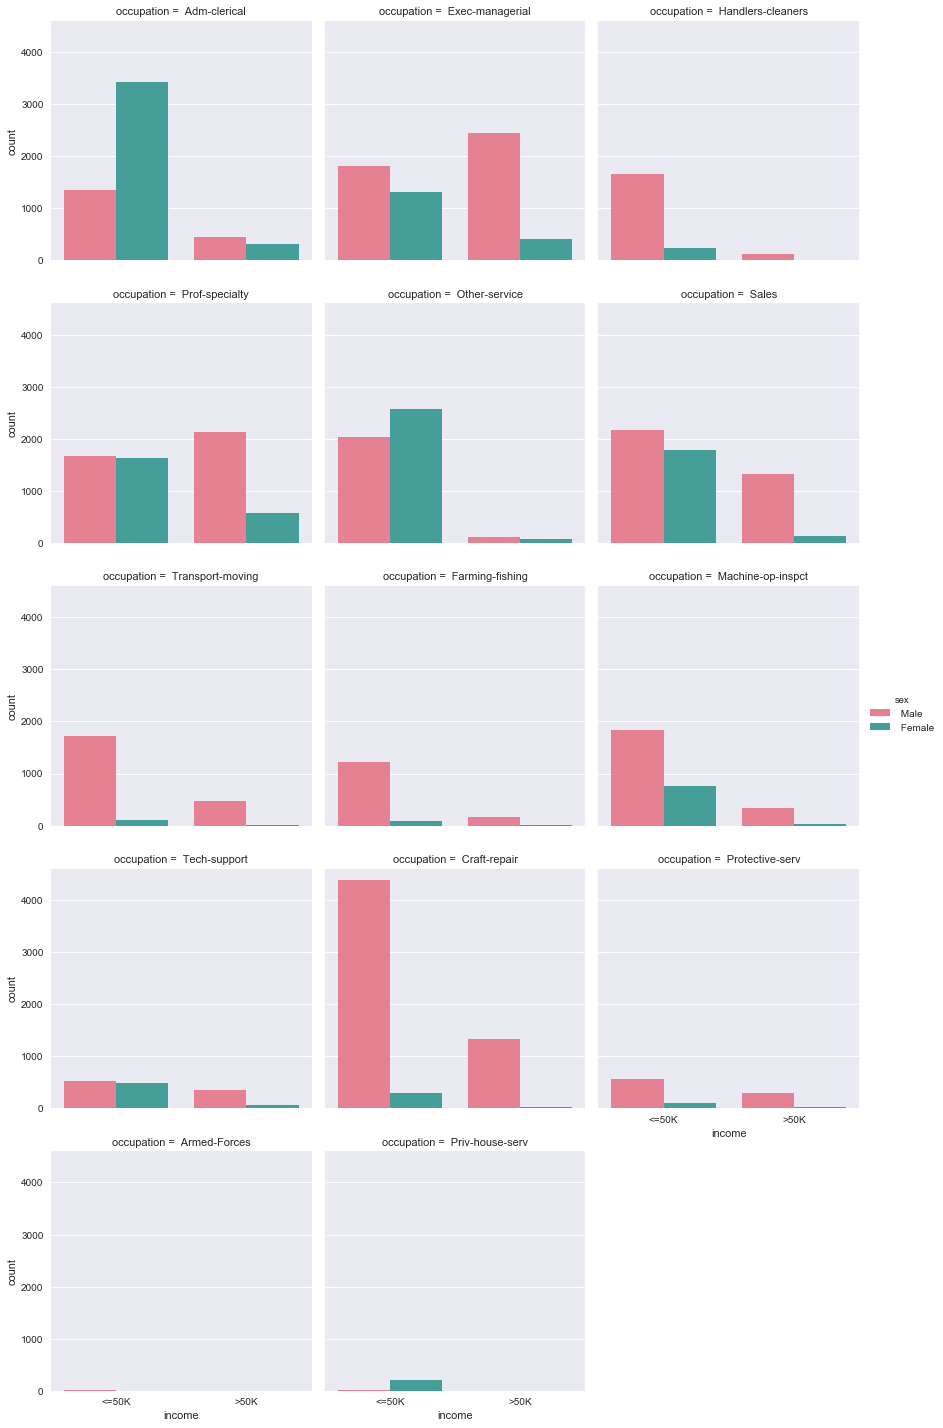

In [7]:
sns.factorplot('income',col='occupation',hue='sex',data=data,col_wrap=3,kind='count',palette='husl')
# female pouplation is obviously lesser than the male population. The main occupations which they earn more than 50K are
# Exec-managerial,Prof-speciality. We can just conclude all other females dont earn more than 50K.

** Race and Occupation vs Income **

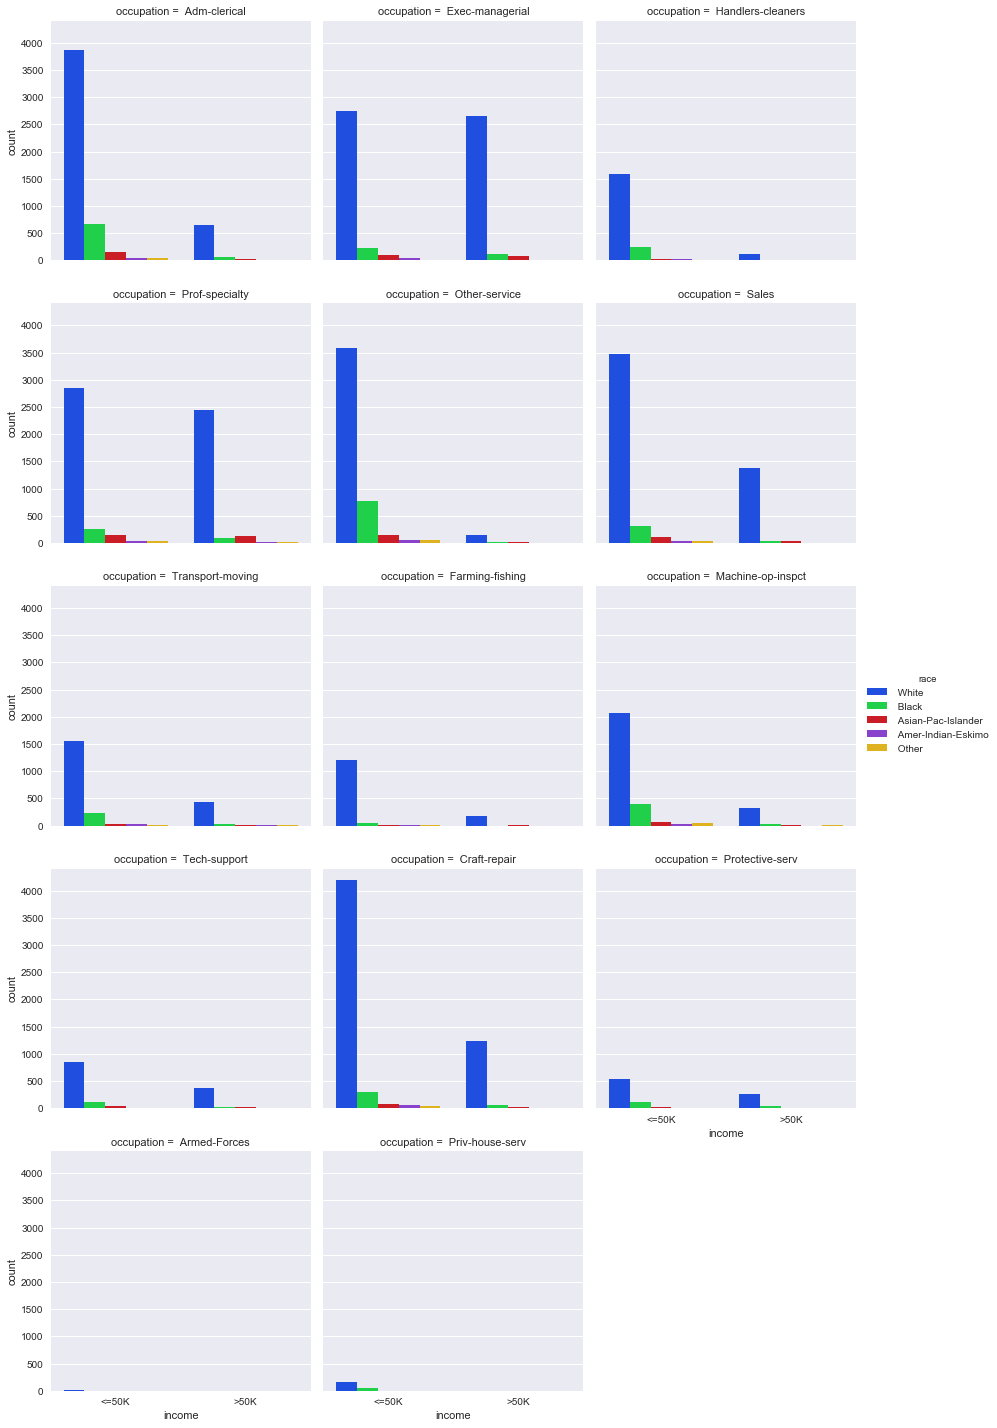

In [8]:
sns.factorplot('income', col='occupation',hue='race', data=data , col_wrap=3 , kind='count')
# The whites are more in number have greater population of 50K.Other races it fair to say that they dont earn more than 50K
# in many of the occupations taking into consideration the ratio.

** Hours-per-week vs Income **

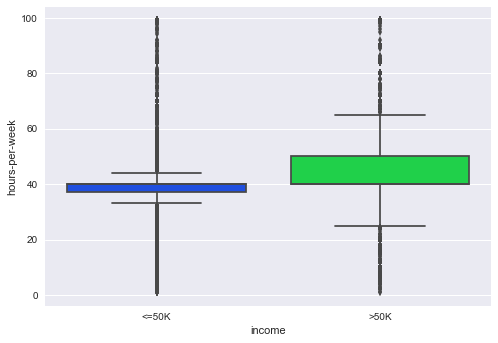

In [9]:
sns.boxplot(x=data['income'],y=data['hours-per-week'])
#sns.boxplot(data['hours-per-week'])
# its fair to say that almost 60% of people with income greater than 50K work more than people with earning less than 50K
# seeing the boxplot below, we can say that upper quartile of people earning less than 50K coincides with lower quartile 
# of people earning more than 50K. 

** Education-level and Occupation vs Income **

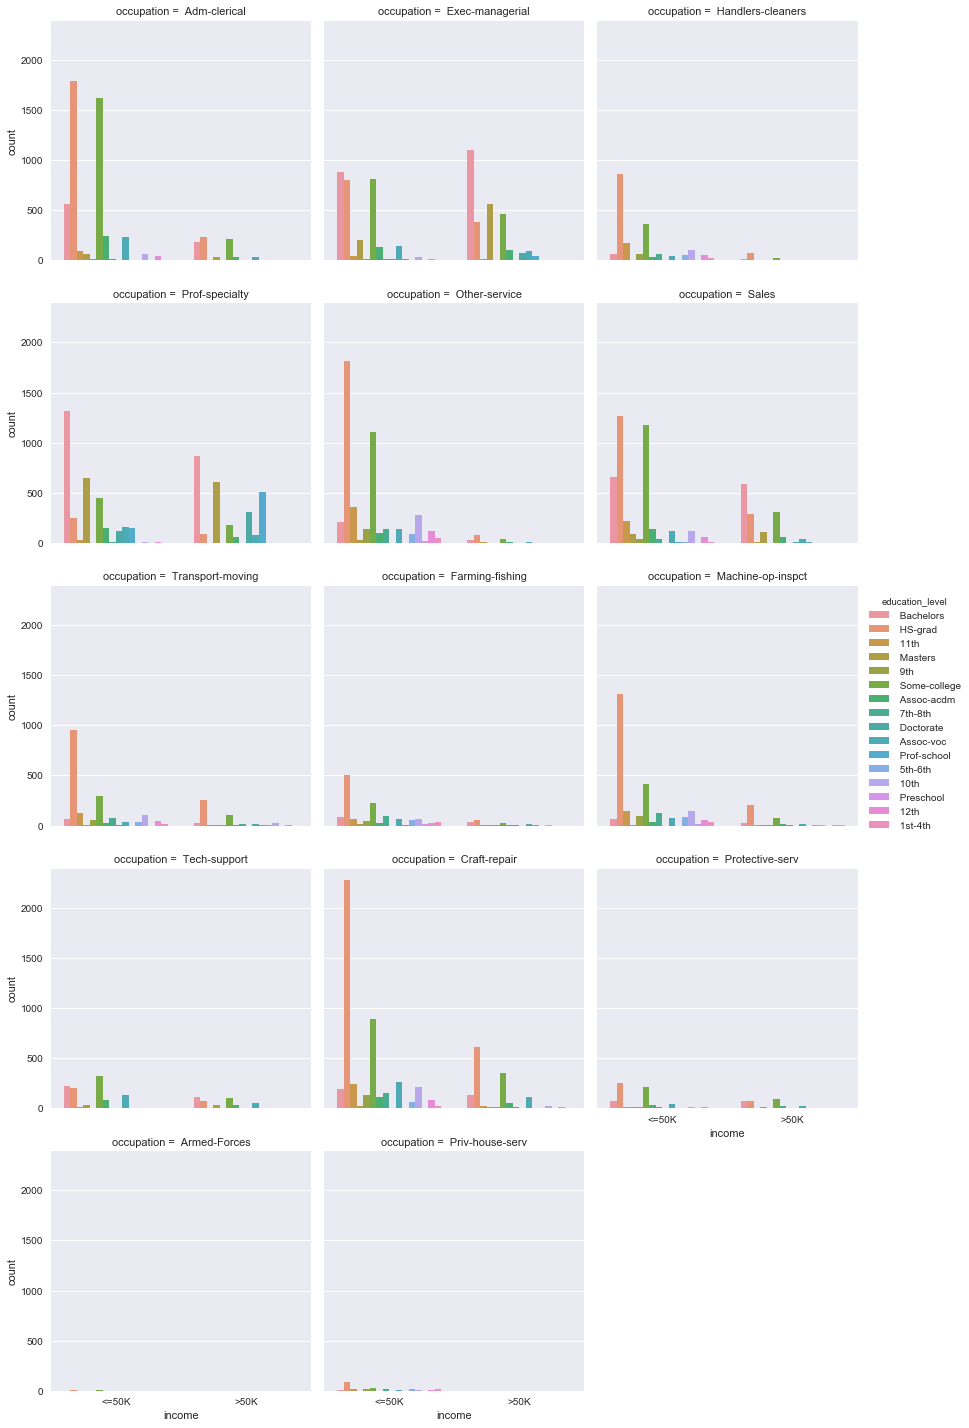

In [10]:
sns.factorplot('income',col='occupation',hue='education_level',data=data,kind='count',col_wrap=3)
# mostly bachelors,Doctorate,prof-school earn more than 50K

** Marital-status vs Income **

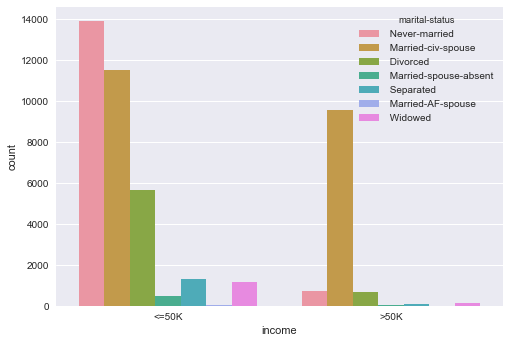

In [11]:
sns.countplot('income',hue='marital-status',data=data)
# This says that people who are never married never earn more than 50K. The Most people whoc actually we have to look for are 
# Married-civ-spouse

**Capital-gain Vs Age**

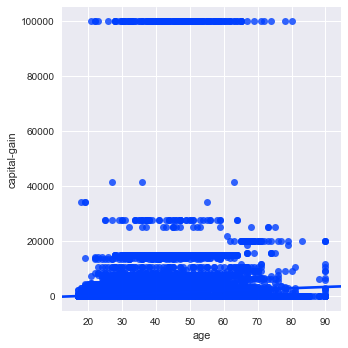

In [12]:
sns.lmplot(x='age',y='capital-gain',data=data)
# people who are old(more than 80) have less capital gain compared to others.

**Capital-gain Vs Income**

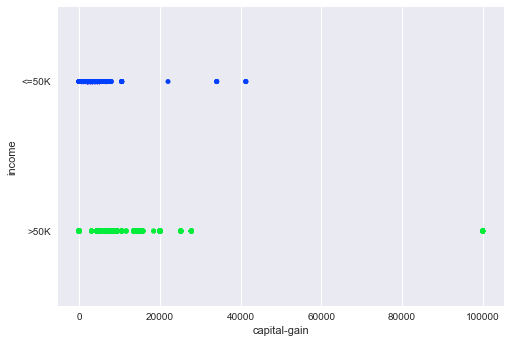

In [13]:
sns.stripplot(x='capital-gain',y='income',data=data)
# people only with 50K above income have capital-gain more than the mean.

** Capital-gain vs Capital-loss **

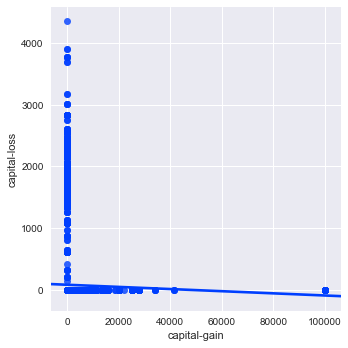

In [14]:
sns.lmplot(x='capital-gain',y='capital-loss',data=data)
# people with more capital-gain have 0 capital-loss and people with more capital-loss have zero capital-gain

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

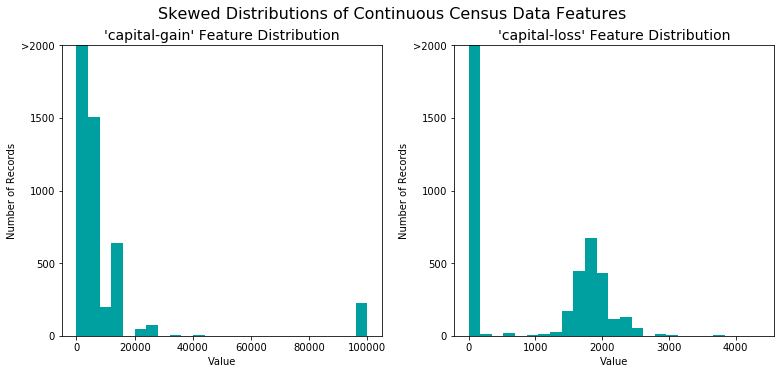

In [6]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

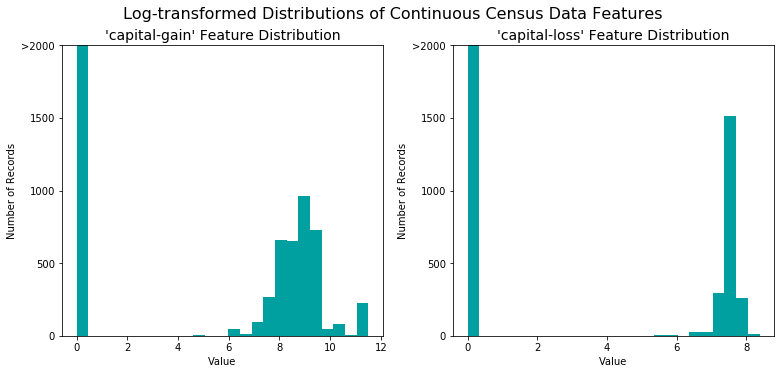

In [7]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [8]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

age          workclass education_level  education-num  \
0  0.301370          State-gov       Bachelors       0.800000   
1  0.452055   Self-emp-not-inc       Bachelors       0.800000   
2  0.287671            Private         HS-grad       0.533333   
3  0.493151            Private            11th       0.400000   
4  0.150685            Private       Bachelors       0.800000   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  
0      0.667492           0.0        0.397959   United-States  
1      0.000000           0.0        0.122449   United-States  
2      0.000000           0.0        0.397959   United-States  
3      0.000000           0.0        0.397959   United-States  
4      0.000000           0.0        0.397959            Cuba

In [9]:
import seaborn as sns

In [10]:
data2=features_log_minmax_transform[features_log_minmax_transform['capital-gain']>0]

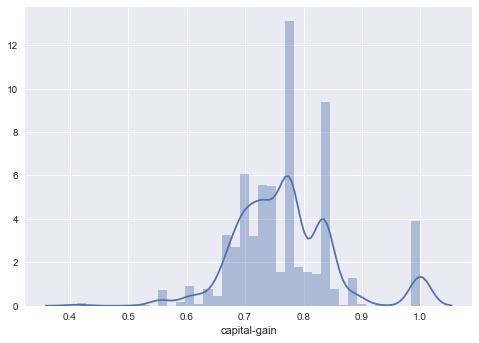

In [11]:
sns.distplot(data2['capital-gain'])
# taking apart the Zero capital gain 

### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_raw'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [12]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
from sklearn.preprocessing import LabelEncoder 
features_final = pd.get_dummies(features_log_minmax_transform)
lb=LabelEncoder()
# TODO: Encode the 'income_raw' data to numerical values
# income = pd.DataFrame(lb.fit_transform(income_raw))
income= income_raw.apply(lambda x:1 if x=='>50' else 0)
# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print "{} total features after one-hot encoding.".format(len(encoded))

# Uncomment the following line to see the encoded feature names
# print encoded

103 total features after one-hot encoding.


In [13]:
income.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [23]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 36177 samples.
Testing set has 9045 samples.


C:\Users\Manju\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 


#### Note: Recap of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

### Question 1 - Naive Predictor Performace
* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

** HINT: ** 

* When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

In [24]:

TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
#encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

# TODO: Calculate accuracy, precision and recall
accuracy = float(TP/(TP+FP))
recall = TP/(TP+FN)
precision = TP/(TP+FP)
beta=0.5
# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
# HINT: The formula above can be written as (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)
fscore = float((1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall))
# Print the results 
print "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore)

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

- Describe one real-world application in industry where the model can be applied. 
- What are the strengths of the model; when does it perform well?
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

** HINT: **

Structure your answer in the same format as above^, with 4 parts for each of the three models you pick. Please include references with your answer.

**Answer: **

** Ada boosting **

1) Its found that ada boost can be used with decision trees and this proves to be the best combination. Here are some references
   Used in coming to this decision.
   
   a)Its used to identify a basketball players face:
   https://www.uni-obuda.hu/journal/Markoski_Ivankovic_Ratgeber_Pecev_Glusac_57.pdf
   
   b)This article some stack overflow tells us Random forsests(which have bagging mechnanism) vs Ada boosting. We need more
   detailed trees with more depth for Random forests. Whereas for Ada boosting we need decision stumps which are decision trees 
   with depth as one. The latter will have high bias and low variance.
   https://stats.stackexchange.com/questions/124628/why-adaboost-with-decision-trees
   
2) The strengths of this model are:

   a) This algorithm uses the concept of weak learners. Which learners are ones with error probality less than 0.5 given 
   any distribution. Decision trees are the best weak learners.
   
   b)The adaboost tries to indentify the hard examples and weighing them more as we progress.This algorithm does very
   well on huge amount of data and has low variance.Ref:
   https://en.wikipedia.org/wiki/AdaBoost
   
   c)The parameter tuning is not required for decsion trees. But if we are using SVM instead of decsion trees, we have to tune many parameters, for each interation we increases cost.
  
3) The weaknesses of this model are:

   AdaBoost can be sensitive to noisy data and outliers. In some problems, however, it can be less susceptible to the      overfitting problem than most learning algorithms. The GRT AdaBoost algorithm does not currently support null rejection, although this will be added at some point in the near future.Ref
   http://www.nickgillian.com/wiki/pmwiki.php/GRT/AdaBoost
   
4) This problem is a classifcation problem as the income can be less than 50k or more than 50K. So decision trees tend to perfom 
   well in case of classifaction problems.Some features are correlated with each other. Like edcation,occupation,capital-gain etc. So its better to use Ada-boost as it tends to reduce overfitiing compared to other samples.This problem is a combination of 
   categorical and numerical variables. Descision trees dont perform so well with continuous variables. So this may induce some bias.
   

**Gradient descent boosting**

1) Gradient descent boosting is another type of boosting which came after Ada boosting. Even this method uses the boosting
ideology of aggregating weak learners. The real life application of this is used to predict P300 component in EEG.
Link to the IEEE paper:
    http://ieeexplore.ieee.org/abstract/document/1419562/?reload=true
   
2)Strengths of this model are:

a) This performs better than Adaboost in case of f-score and accuracy. It fits from the gradient of loss function to determine the step function. this is an additive model where the current model fits the error of the previous model.

b)Mainly Decision trees are most used with Gradient descent boosting. They are best examples of weak learners and require less parameter tuning.

c)They tend of overfit less because, its an additive model, we use short decision trees where the learning rate is low and more number of estimators to reduce overfitting so that only little variations happen in each iteration of the trees.

d)The can be used with any type of loss function aka SSE,exponential etc.Computing the gamma(step function) will change accordingly.

3)Weakness of the model

a) This is complex model. Desicion trees can themselves be overfitting sometimes and are very sensitive to noisy data. Aggregation them can chain the bias from each tree.

b)This is costly as there are so many parameters to be computed. Redisual,gradient, building a tree for it, adding the result 
of the previous tree to the current one etc.

Ref:The Elements Of Statistical Learning[http://www.springer.com/in/book/9780387848570]

c)These can also overfit sometimes due to bayes error.

4) This method is used for this type of data because, this a classification problem,

a) The data has mixed type of variables,categorical and numerical, hence decision trees.

b) There is high correlation bwtween the variables so a normal decision tree is not enough. May tend to overfit or does not give proper results.

**Support Vector machine**

1) Wanted to explore methos other than boosting so took up support vector machine.

2) They are used for a variety of real world problems. One to predict a type of a disease given various parameters
https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/1472-6947-10-16

3)Strengths of SVM:

a) The SVMs have kernel function which construct a decision boundary for both data which are linearly seperable and which are non linear. The kernel functions are constructed based on the similarity between the support vectors.

b) They are robust to the nosiy data unlike the decision trees.The also dont have a rigid decision boundary. Many types of kernel function which constructs a hyperplane best suited to make a smooth decision boundary.

c)We need not have to explicitly construct another coordinate axes to construct a hyperplane, kernel function takes care of this by duplicating the same characteristics and plot the function on the original plane.

4)Weakness of SVM:

a)SVM is very complicated as it has the application of the kernel function which is very expensive.

b)It tends to overfit if not trained properly.

Ref :https://www.quora.com/What-are-the-advantages-of-support-vector-machines-SVM-compared-with-linear-regression-or-logistic-regression

5)Its used in this data as its a classification problem. It also has a lot of data and is very skewed.

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [67]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score,accuracy_score
from sklearn.ensemble import AdaBoostClassifier
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    print sample_size
    start = time() # Get start time
    y_train1=np.array(y_train[0])
    learner.fit(X_train[:sample_size],y_train1[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end-start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end-start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train1[:300],predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train1[:300],predictions_train,beta=0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test,predictions_test,beta=0.5)
       
    # Success
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

361
AdaBoostClassifier trained on 361 samples.
3617
AdaBoostClassifier trained on 3617 samples.
36177
AdaBoostClassifier trained on 36177 samples.
361
SVC trained on 361 samples.
3617
SVC trained on 3617 samples.
36177
SVC trained on 36177 samples.
361
GradientBoostingClassifier trained on 361 samples.
3617
GradientBoostingClassifier trained on 3617 samples.
36177
GradientBoostingClassifier trained on 36177 samples.


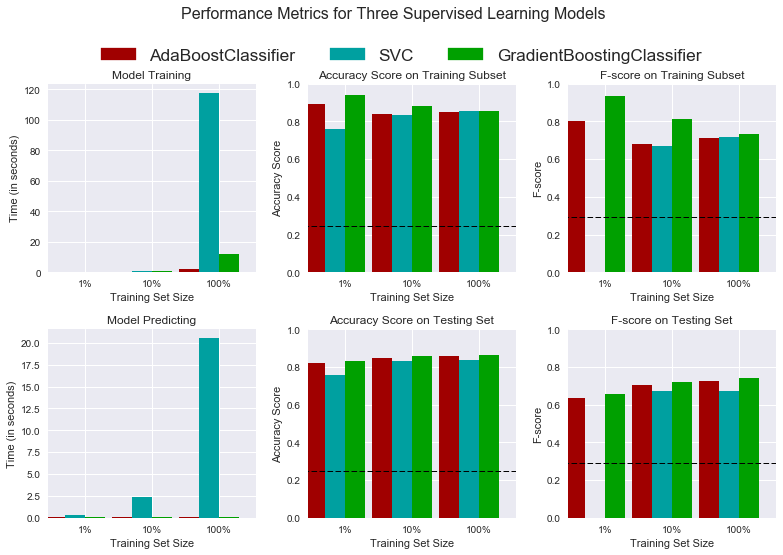

In [43]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# TODO: Initialize the three models
clf_A = AdaBoostClassifier(random_state=2)
clf_B = SVC(random_state=1)
clf_C = GradientBoostingClassifier(random_state=3)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100
# HINT: samples_1 is 1% of samples_100
samples_100 = len(y_train)
samples_10 = int(0.1 * samples_100)
samples_1 = int(0.01 * samples_100)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model

* Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000. 

** HINT: ** 
Look at the graph at the bottom left from the cell above(the visualization created by `vs.evaluate(results, accuracy, fscore)`) and check the F score for the testing set when 100% of the training set is used. Which model has the highest score? Your answer should include discussion of the:
* metrics - F score on the testing when 100% of the training data is used, 
* prediction/training time
* the algorithm's suitability for the data.

**Answer: **

1) The F-score when 100% of the data is used is the greatest for GradientBoostingClassifier. So this is best model to be chosen

2) The GradientBoosting takes a little more training time than AdaBoost,but the prediction time is very less.

3) This algorithm is best suited for Classification problems which have a high correlation between the features. The weak learner being decision tree helps us achieve the best result for these kinds of problems.Comparing all the three algorithms,GradientBoosting is the best.

4) The boosting algorithms always have a high bias and low variance

5) In case of bais-variance tradeoff in SVM, it depends on the C value. Fore high C value, its high bias and less variance. It the reverse in case of small C.

### Question 4 - Describing the Model in Layman's Terms

* In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical jargon, such as describing equations.

** HINT: **

When explaining your model, if using external resources please include all citations.

**Answer: ** 

This model is chosen because is performs better than Adaboost ,Random Forests,decision trees. Its best combination is with decision trees as it does not require much parameter tuning. This algorithm trains on different subsamples of the data , Computes the loss incurred comparing the predicted with true value. The negative gradient descent of the loss function is calculated i.e at what rate,direction,value should the error reduce in order to make the predict value almost closer to the actual value. The loss function is called the residual. It is different for different kinds(Classification and regression). Methods like sum of squared erroer , absolute mean error etc for Regression. Binomial deviance,exponential loss(leads to Adaboost) functions for classification. the step function is calculated using line search methods(eg : golden ratio).

The rediduals are calculated for each each example in the distribuation. They are then passed on to the Descision tree. By using the residuals, the decision tree computes the best splits by taking gini or entropy. It dividies these residuals into various sections. After the max depth of tree is reached, average of all the residuals belonging to the same class is taken , multiplied with step,learning rate,direction and multiplied with current prediction to compute the next prediction.This is an additive model and follows forward stagewise method.Decision trees have a number of abilities that make them valuable for Gradient boosting, namely the ability to handle data of mixed type and the ability to model complex functions.

The step function in case of SSE is calculated using mean of the residuals of the same class

Ref:http://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting

http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/

In [ ]:
Assume The GradientBoosting is employing three ninjas Mary,Jane and Jack to find kidnapped panda in a maze. Here are some rules
of the maze. 
1)Only one ninja can enter the maze at a time and
2)Each ninja has the strength to cover only one path 
3)ninjas should never talk to one another in fear that panda will be taken away again.
4)Each ninja can go into the maze only after the other comes out!
4)Each ninja after covering a path must paint the path red if he did not find the panda in that path so that the other ninja 
does not follow the same path again

First jack enters the maze.He follows a path and does not find the panda. he paints it red and comes back.
Dejected that jack did not find the panda,mary enters the maze next.



![title](stage-1.png)

Mary sees all the three paths gets to know the path which does not have panda as its painted in red. She follows another path
Again she does not find the panda. She paints the whole path red too.

![title](stage-2.png)

Dejected that mary did not find the panda,Jane enters the maze next. She sees two paths painted in red as gets to know these 
paths dont have panda. So she follows another path. She is finally successful in finding and returns back with the panda!

![title](stage-3.png)

This is a very simple interpretation of GradientBoosting. Each person an information about how they failed to another person.
The next person is careful to not repeat the same mistake and further adds more information to the other person.
So their Losses are added up to find the successful result!

** A Fairly technical interpretation of the figure **

The ninjas are interpreted as decision trees here with only one depth (decision stumps) as they can follow only one path.
The move in a tree like matter to find the panda.The loss function here is coloring the path by red. This loss is used by another
ninja to compue the answer.

If one ninja was used instead of three. He would have energy to go only in one path and would have to choose between three paths.
Even if he did have the power to cover all three paths, He would have to alone cover all paths and take more time and energy.

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [63]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeClassifier

# TODO: Initialize the classifier
#dt = DecisionTreeClassifier()
clf = GradientBoostingClassifier(random_state=10)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
# parameters =  {"base_estimator__criterion" : ["gini", "entropy"],
#               "base_estimator__splitter" :   ["best", "random"],
#               "n_estimators": [1,2] , "learning_rate": [0.5,1,2]
#              }
parameters ={ "learning_rate": [0.005,0.05,0.1],"n_estimators":[50,100,120] }
#parameters = {"n_estimators":[1200],"learning_rate":[0.005],"min_samples_split":[1200], "min_samples_leaf":[60],"subsample":[0.85]}
# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score,beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf,parameters,scorer)

#length
y_train1= np.array(y_train[0])

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train,y_train1)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5))
print "\nOptimized Model\n------"
print grid_fit.best_params_
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))

Unoptimized model
------
Accuracy score on testing data: 0.8630
F-score on testing data: 0.7395

Optimized Model
------
{'n_estimators': 120, 'learning_rate': 0.1}
Final accuracy score on the testing data: 0.8643
Final F-score on the testing data: 0.7405


### Question 5 - Final Model Evaluation

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  

**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Benchmark Predictor | Unoptimized Model | Optimized Model |
| :------------: | :-----------------: | :---------------: | :-------------: | 
| Accuracy Score |    0.2478           |     0.8630        |    0.8643       |
| F-score        |    0.2917           |     0.7395        |    0.7405       |


**Answer: **

1)The F-score on the testing data is 0.7405

2)Yes, They are better than unoptimized model.

3)The optimized model is way better than the naive predictor as optimized model reduced False Positives

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

**Answer:**
1) Occupation: Some occupation tend to have more income than others.

2) Relationship: As married people tend to earn more income

3) Capital-gain: more capital-gain idicates more income

4) Capital-loss: more capital-loss indicates less income

5) education: higher the education, he tends to choose an occupation which pays more.

### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

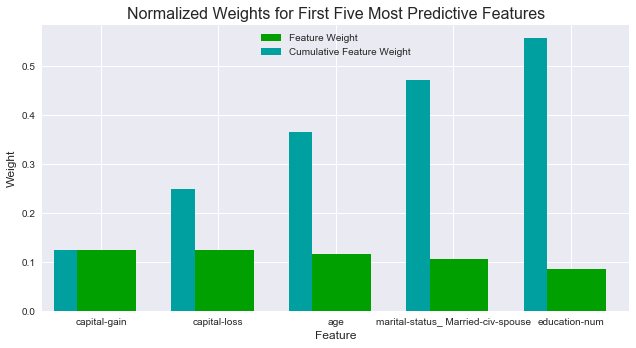

[ 0.12459636  0.12339814  0.11631013  0.10590704  0.08533637]


In [64]:
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import AdaBoostClassifier

# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
#model = clf.fit(X_train,y_train1)
# TODO: Extract the feature importances using .feature_importances_ 
importances = best_clf.feature_importances_
# Plot
vs.feature_plot(importances, X_train, y_train1)

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
* If you were close to the same answer, how does this visualization confirm your thoughts? 
* If you were not close, why do you think these features are more relevant?

**Answer:**

1)I had Guessed three features right, capital-gain,capital-loss and relationship.

2)I was not so close with other features i did not guess.I will explian by showing some viusalizations

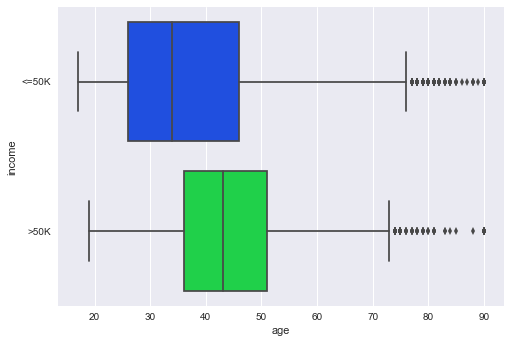

In [65]:
sns.boxplot(y='income',x='age',data=data)

Here the lower quartile of people earning >50K(almost 35-37) is almost greater than the median of the people earning <=50k. Median of the green bar is a little less then upper quartile of blue bar. This helpas us amek some assumptions on how diffrent age groups are earning.

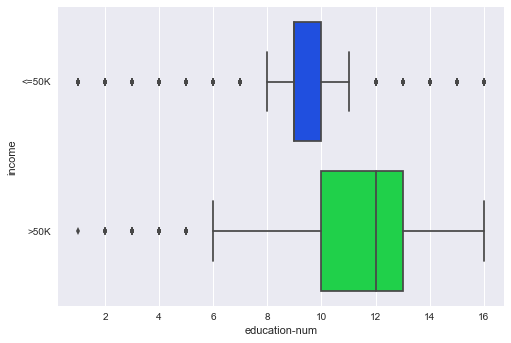

In [69]:
sns.boxplot(x="education-num",y="income",data=data)

This infact gives a lost of information. The lower quartile of >50K matches exactly with upper quartile of <=50K. Its safe to say almost 75% of people earining more than 50K have education num greater than 10.

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [66]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train1)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print "Final Model trained on full data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))
print "\nFinal Model trained on reduced data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5))

Final Model trained on full data
------
Accuracy on testing data: 0.8643
F-score on testing data: 0.7405

Final Model trained on reduced data
------
Accuracy on testing data: 0.8586
F-score on testing data: 0.7257


### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

**Answer:**

1) There is actually not much of a difference in using 5 features to all the features.Not much effect in F-score.

2) Yes I would consider Reduced data as my training set as it takes less time than the other and ends up giving almost same accuracy and F-score

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.